In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/content/drive/My Drive/Skripsi/1.tiff  as secret image


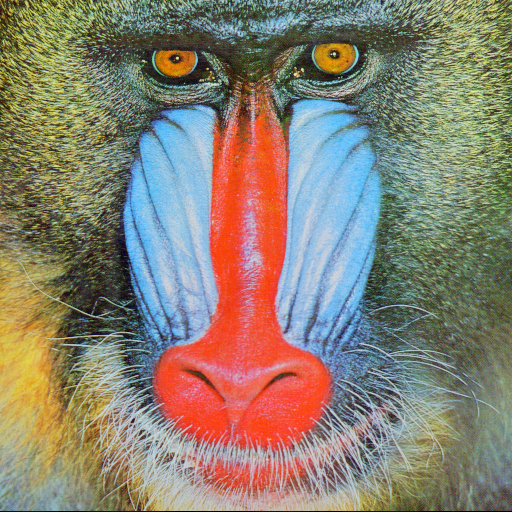

/content/drive/My Drive/Skripsi/2.tiff  as secret image


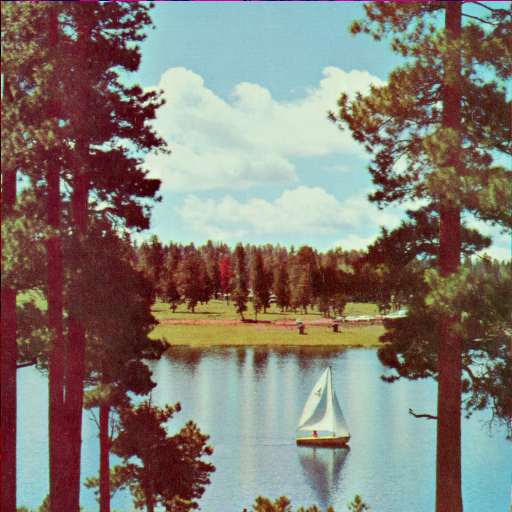

/content/drive/My Drive/Skripsi/3.tiff  as secret image


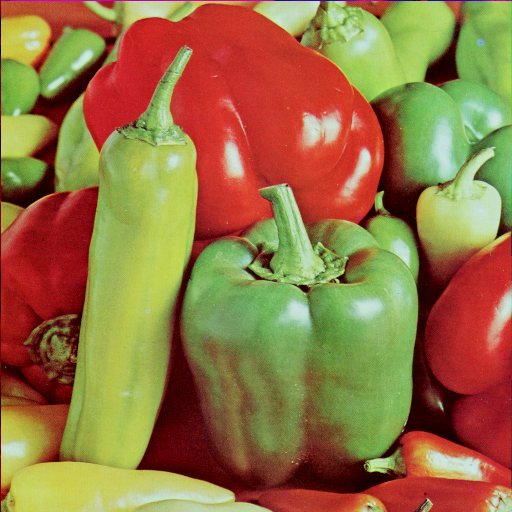

/content/drive/My Drive/Skripsi/4.tiff  as Cover Image


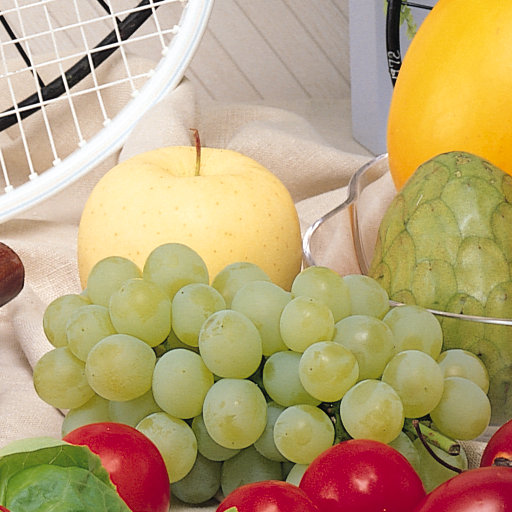

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

secretImage=[]
numberOfSecretImage=3
for imageIndex in range(numberOfSecretImage):
  imageLocation='/content/drive/My Drive/Skripsi/{}.tiff'.format(imageIndex+1)
  print(imageLocation," as secret image")
  secretImage.append(cv2.imread(imageLocation))
  cv2_imshow(secretImage[imageIndex])
coverImageLocation='/content/drive/My Drive/Skripsi/4.tiff'
print(coverImageLocation," as Cover Image")
coverImage=cv2.imread(coverImageLocation)
cv2_imshow(coverImage)

In [0]:
#GenerateSharedImage Friendly
import numpy.matlib
def generatedSharedFriendlyImage(secretImage1,coverImage):
  #(np.vectorize(float(secretImage[0])))
  temp=np.zeros(secretImage1[0].shape)
  temp=temp.astype(np.uint8)
  #tahap1
  #Hashing Image yang akan menjadi key untuk block chipper
  for imageIndex in range(len(secretImage1)):
    temp = temp^(secretImage1[imageIndex])
  hash_method= cv2.img_hash.BlockMeanHash_create()
  output_hash=hash_method.compute(temp)
  print(output_hash)  
  _,dim_hash=output_hash.shape
  height,width,channel=temp.shape

  R=np.zeros(temp.shape)
  #merubah temp menjadi grayscale
  temp_gs= 0.299 * temp[:,:,0] + 0.587 * temp[:,:,1] + 0.114 * temp[:,:,2];
  #Proses Block Chipper
  counter=0
  for i in range(height):
    for j in range(0,width,dim_hash):
      block_data=temp_gs[i,j:j+dim_hash]
      temp_mod= counter%dim_hash
      np.random.seed(block_data[temp_mod].astype('int64')+output_hash[0][temp_mod])
      block_data_random=np.random.randint(0,255,dim_hash)
      temp_gs[i][j:j+dim_hash]=block_data_random
      counter+=1

  R=np.zeros(secretImage[0].shape).astype('uint8')
  R[:,:,0]=temp_gs
  R[:,:,1]=temp_gs
  R[:,:,2]=temp_gs
  
  randomImage=np.zeros((len(secretImage1),len(secretImage1[0]),len(secretImage[0][0]),len(secretImage[0][0][0]))).astype('uint8')

  #tahap 2
  for imageIndex in range(numberOfSecretImage):
    for x in range(height):
      for y in range(width):
        for z in range(channel):
          randomImage[imageIndex][x][y][z]=(R[(x-imageIndex)%height][(y-imageIndex)%width][(z-imageIndex)%channel]^R[(x+imageIndex)%height][(y+imageIndex)%width][(z+imageIndex)%channel])

  #tahap 3
  sharedImage=[]
  for imageIndex in range(numberOfSecretImage-1):
    sharedImagePart=np.zeros(secretImage[0].shape)
    sharedImagePart=secretImage1[imageIndex]^(randomImage[imageIndex]^randomImage[imageIndex+1])
    sharedImage.append(sharedImagePart)
  sharedImagePart=np.zeros(secretImage[0].shape)
  sharedImagePart=secretImage1[imageIndex+1]^(randomImage[numberOfSecretImage-1]^randomImage[0])
  sharedImage.append(sharedImagePart)
  sharedFriendlyImage=[]
  for imageIndex in range(numberOfSecretImage):
    sharedFriendlyImage.append(((sharedImage[imageIndex]/16)+coverImage))

  return sharedFriendlyImage

[[ 12 216 244  35 252  39 138   1 176   9 249   1 232 145 168  94 137  25
  152 153  59 150 113 134 240 146 163 110 119  96 195 241]]
Shared Friendly Image:  1


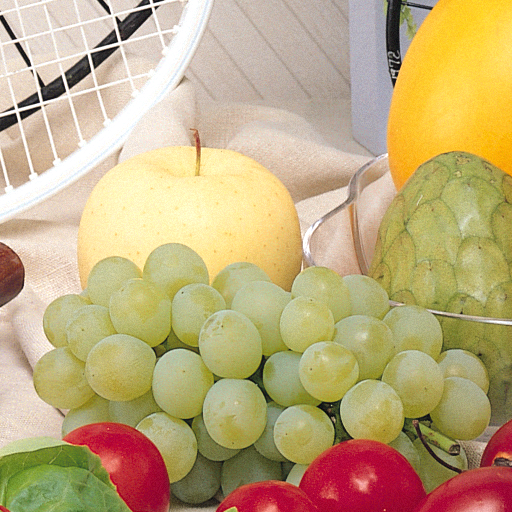

Shared Friendly Image:  2


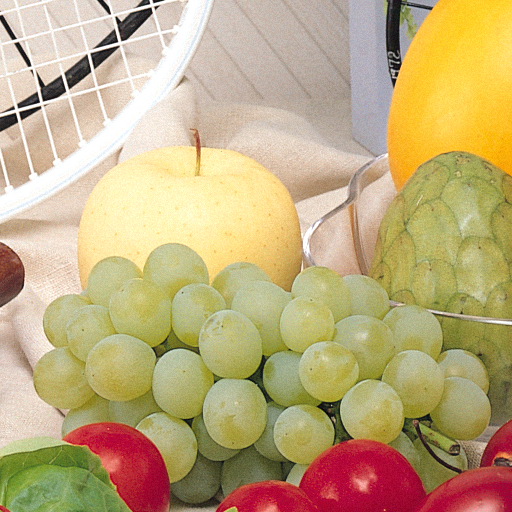

Shared Friendly Image:  3


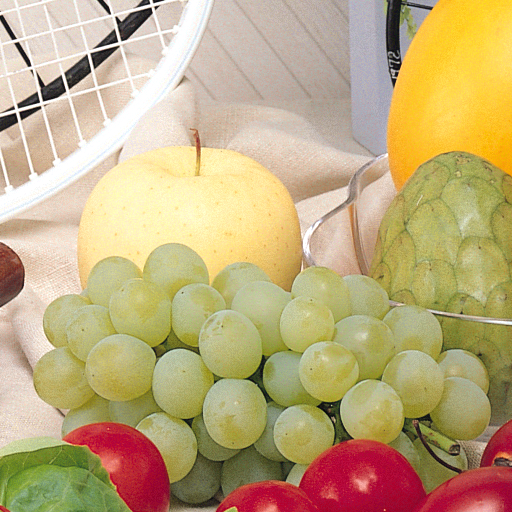

In [0]:
sharedFriendlyImage=generatedSharedFriendlyImage(secretImage,coverImage)
for imageIndex in range(numberOfSecretImage):
  print("Shared Friendly Image: ",imageIndex+1)
  cv2_imshow(sharedFriendlyImage[imageIndex])

In [0]:
def generatedRecoveryFriendlyImage(secretImage1,coverImage):
  for imageIndex in range(len(secretImage1)):
    secretImage1[imageIndex]=((secretImage1[imageIndex]-coverImage)*16).astype('uint8')

  #(np.vectorize(float(secretImage[0])))
  temp=np.zeros(secretImage1[0].shape)
  temp=temp.astype(np.uint8)
  #tahap1
  #Hashing Image yang akan menjadi key untuk block chipper
  for imageIndex in range(len(secretImage1)):
    temp = temp^(secretImage1[imageIndex])
  hash_method= cv2.img_hash.BlockMeanHash_create()
  output_hash=hash_method.compute(temp)
  print(output_hash)  
  _,dim_hash=output_hash.shape
  height,width,channel=temp.shape

  R=np.zeros(temp.shape)
  #merubah temp menjadi grayscale
  temp_gs= 0.299 * temp[:,:,0] + 0.587 * temp[:,:,1] + 0.114 * temp[:,:,2];

  #Proses Block Chipper
  counter=0
  for i in range(height):
    for j in range(0,width,dim_hash):
      block_data=temp_gs[i,j:j+dim_hash]
      temp_mod= counter%dim_hash
      np.random.seed(block_data[temp_mod].astype('int64')+output_hash[0][temp_mod])
      block_data_random=np.random.randint(0,255,dim_hash)
      temp_gs[i][j:j+dim_hash]=block_data_random
      counter+=1

  R=np.zeros(secretImage[0].shape).astype('uint8')
  R[:,:,0]=temp_gs
  R[:,:,1]=temp_gs
  R[:,:,2]=temp_gs
  
  
  randomImage=np.zeros((len(secretImage1),len(secretImage1[0]),len(secretImage[0][0]),len(secretImage[0][0][0]))).astype('uint8')

  #tahap 2
  for imageIndex in range(numberOfSecretImage):
    for x in range(height):
      for y in range(width):
        for z in range(channel):
          randomImage[imageIndex][x][y][z]=(R[(x-imageIndex)%height][(y-imageIndex)%width][(z-imageIndex)%channel]^R[(x+imageIndex)%height][(y+imageIndex)%width][(z+imageIndex)%channel])
  #tahap 3
  sharedImage=[]
  for imageIndex in range(numberOfSecretImage-1):
    sharedImagePart=np.zeros(secretImage[0].shape)
    sharedImagePart=secretImage1[imageIndex]^(randomImage[imageIndex]^randomImage[imageIndex+1])
    sharedImage.append(sharedImagePart)
  sharedImagePart=np.zeros(secretImage[0].shape)
  sharedImagePart=secretImage1[imageIndex+1]^(randomImage[numberOfSecretImage-1]^randomImage[0])
  sharedImage.append(sharedImagePart)
  

  return sharedImage

[[ 12 216 244  35 252  39 138   1 176   9 249   1 232 145 168  94 137  25
  152 153  59 150 113 134 240 146 163 110 119  96 195 241]]
Recovery Image:  1


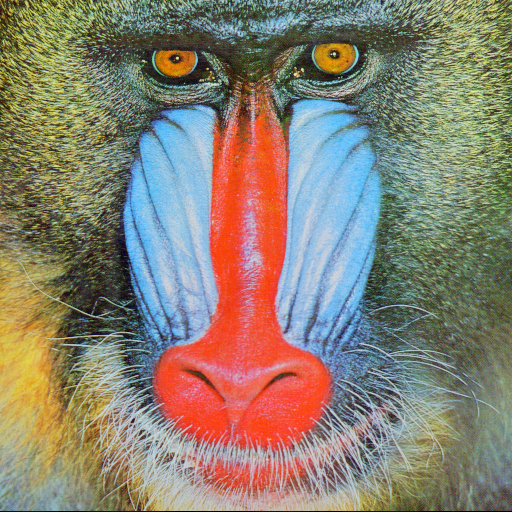

Recovery Image:  2


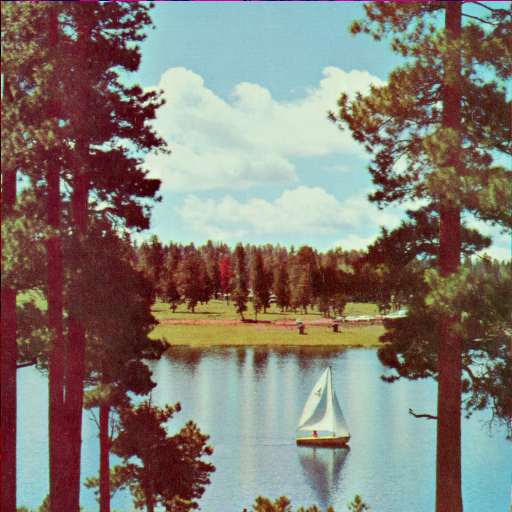

Recovery Image:  3


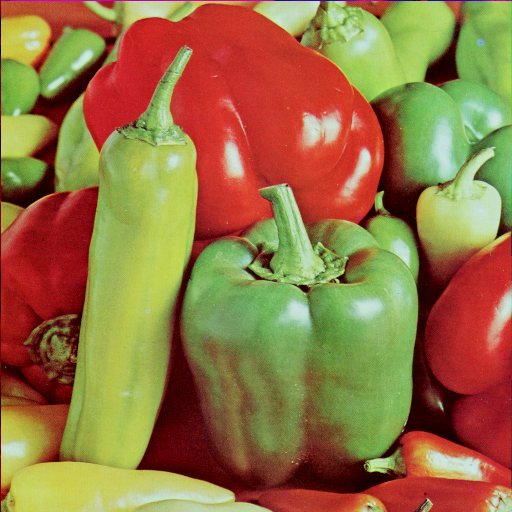

In [0]:
recoveryImage=generatedRecoveryFriendlyImage(sharedFriendlyImage,coverImage)
for imageIndex in range(numberOfSecretImage):
  print("Recovery Image: ",imageIndex+1)
  cv2_imshow(recoveryImage[imageIndex])

In [0]:
print(sharedFriendlyImage[0]^sharedFriendlyImage[1]^sharedFriendlyImage[2])

[[[ 71 150 164]
  [201  57 185]
  [214  43 207]
  ...
  [183 119   6]
  [184 170 241]
  [168 188 179]]

 [[ 62 125 120]
  [ 93 128 191]
  [114  10  10]
  ...
  [225 139 146]
  [  3 243 123]
  [176 128 120]]

 [[ 31  74  99]
  [ 80 155 188]
  [ 90 252  14]
  ...
  [219  64 158]
  [200  64 180]
  [ 51  37  96]]

 ...

 [[155 148 121]
  [145  26  93]
  [163  17 172]
  ...
  [ 80  37 176]
  [ 92  55 156]
  [137 235  59]]

 [[168 169 126]
  [133 242 165]
  [161 239  72]
  ...
  [ 39  54 132]
  [ 80  61 185]
  [ 12 224  68]]

 [[ 12  11   9]
  [ 50  76  38]
  [ 46 135 210]
  ...
  [ 89 113 199]
  [ 13 115 219]
  [157  77  17]]]
